In [40]:
import keras 
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [42]:
import os
current_path = os.getcwd()

races_path = current_path+"\Data\images\Images\\"

In [43]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(races_path,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 subset="training",
                                                 shuffle=True,
                                                 seed=42,
                                                 class_mode = 'categorical')

validation_set = train_datagen.flow_from_directory(races_path,
                                                 shuffle=False,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 subset="validation",
                                                 
                                                 seed=42,
                                                 class_mode = 'categorical')

Found 2911 images belonging to 20 classes.
Found 718 images belonging to 20 classes.


In [44]:
validation_set.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6

In [45]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size


In [66]:
    from keras.layers import Dropout

    IMAGE_SIZE = [224, 224]
    vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    #here [3] denotes for RGB images(3 channels)

    for layer in vgg.layers:
     layer.trainable = False

    x = Dropout(0.3)(vgg.output)
    x = Flatten()(x)
    x = Dropout(0.3)(x)

    prediction = Dense(20, activation='softmax')(x)
    model = Model(inputs=vgg.input, outputs=prediction)
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizers.Adam(),
                        metrics=['accuracy'])
    model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [67]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_reducer]
start = datetime.now()
history = model.fit_generator(training_set, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    epochs = 18, verbose=True, 
                    validation_data = validation_set, 
                    validation_steps = STEP_SIZE_VALID)
duration = datetime.now() - start
print("Training completed in time: ", duration)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/18
363/363 [==============================] - 326s 897ms/step - loss: 3.9903 - accuracy: 0.1501 - val_loss: 2.5424 - val_accuracy: 0.3553
Epoch 2/18
363/363 [==============================] - 327s 900ms/step - loss: 2.1745 - accuracy: 0.4643 - val_loss: 2.8917 - val_accuracy: 0.3876
Epoch 3/18
363/363 [==============================] - 323s 891ms/step - loss: 1.9766 - accuracy: 0.5386 - val_loss: 3.4023 - val_accuracy: 0.3539
Epoch 4/18
363/363 [==============================] - 323s 891ms/step - loss: 1.7948 - accuracy: 0.5754 - val_loss: 3.0983 - val_accuracy: 0.4228
Epoch 5/18
363/363 [==============================] - 315s 867ms/step - loss: 1.4647 - accuracy: 0.6258 - val_loss: 2.9251 - val_accuracy: 0.4354
Epoch 6/18
363/363 [==============================] - 320s 881ms/step - loss: 1.4615 - accuracy: 0.6614 - val_loss: 2.6036 - val_accuracy: 0.4888
Epoch 7/18
363/363 [==============================] - 316s 872ms/step - loss: 1.3939 - accuracy: 0.6877 - val_loss: 2.9735 -

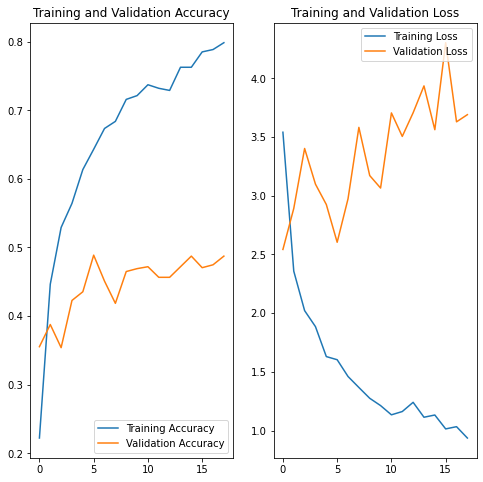

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(18)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
y_prob = model.predict(validation_set) 
y_classes = y_prob.argmax(axis=-1)

In [70]:
print(y_classes)

[17  5 16  1 19  0 15  0  9  0 19  0  0 10  0  0  4 15  0 15  0  0  0 19
  0  0  0  0 10 10  1  1  2  1  1  1 14  1  1  1  8  1  1  1  1 10  1  1
  0  1  1  1 16  5  1 16  1  1 16 16  1  9 16  1 16  1  3 10 16  8  2  2
  5  2  2  6 11  8  9  3  2  4  2  2  2  3  8  2  2  5 11  2  5  8  2  2
  4  6  5  5 11 17 11  3 11 17  3  2  3  3  3  3  8 17  3  3 11  3 14 17
  9  3  3  3 11  3  3  9  3  8  2  3  3  3  3  3  3  3  3  3  9  4  2  3
 11  4 14  4  6 14  4  9 15  4  9  6 14  4  4  8 11 17 11  3  3  4  9  4
  4  4  5  4  4  4  4 11 17  4  8  4  3  5  5  5  5  7  5  5  2  2  5  5
  6  5  2  5  5  5 13  3  5  2  4  5  5  3  5  5  6 11 11  4  5  5  5  4
  8  5  5  2  5  5  9 16  6  2  6  9  6  6  6  6  9  6  6  6 11  6  6  9
  6  9 17  6  6 17  6  6  6  6  9  9 11  6  9  6  6  6  1  9 13  7 15  5
  5  6  5 17  0 13  5 13  5 13  7  7  8  5  5  7 15  9  7  5  7  7  5  2
  9 11  8  8  8 11  8  8  8  8  8  3  9  8  3  2  8  4  3  8 11  8  8  8
 11 11  8  8  8  8  8 11 15  8  8  8 14  8  9  5  2

In [71]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_classes, validation_set.classes)


In [72]:
label_list=[]
for i in validation_set.class_indices.keys():
    label_list.append(i)

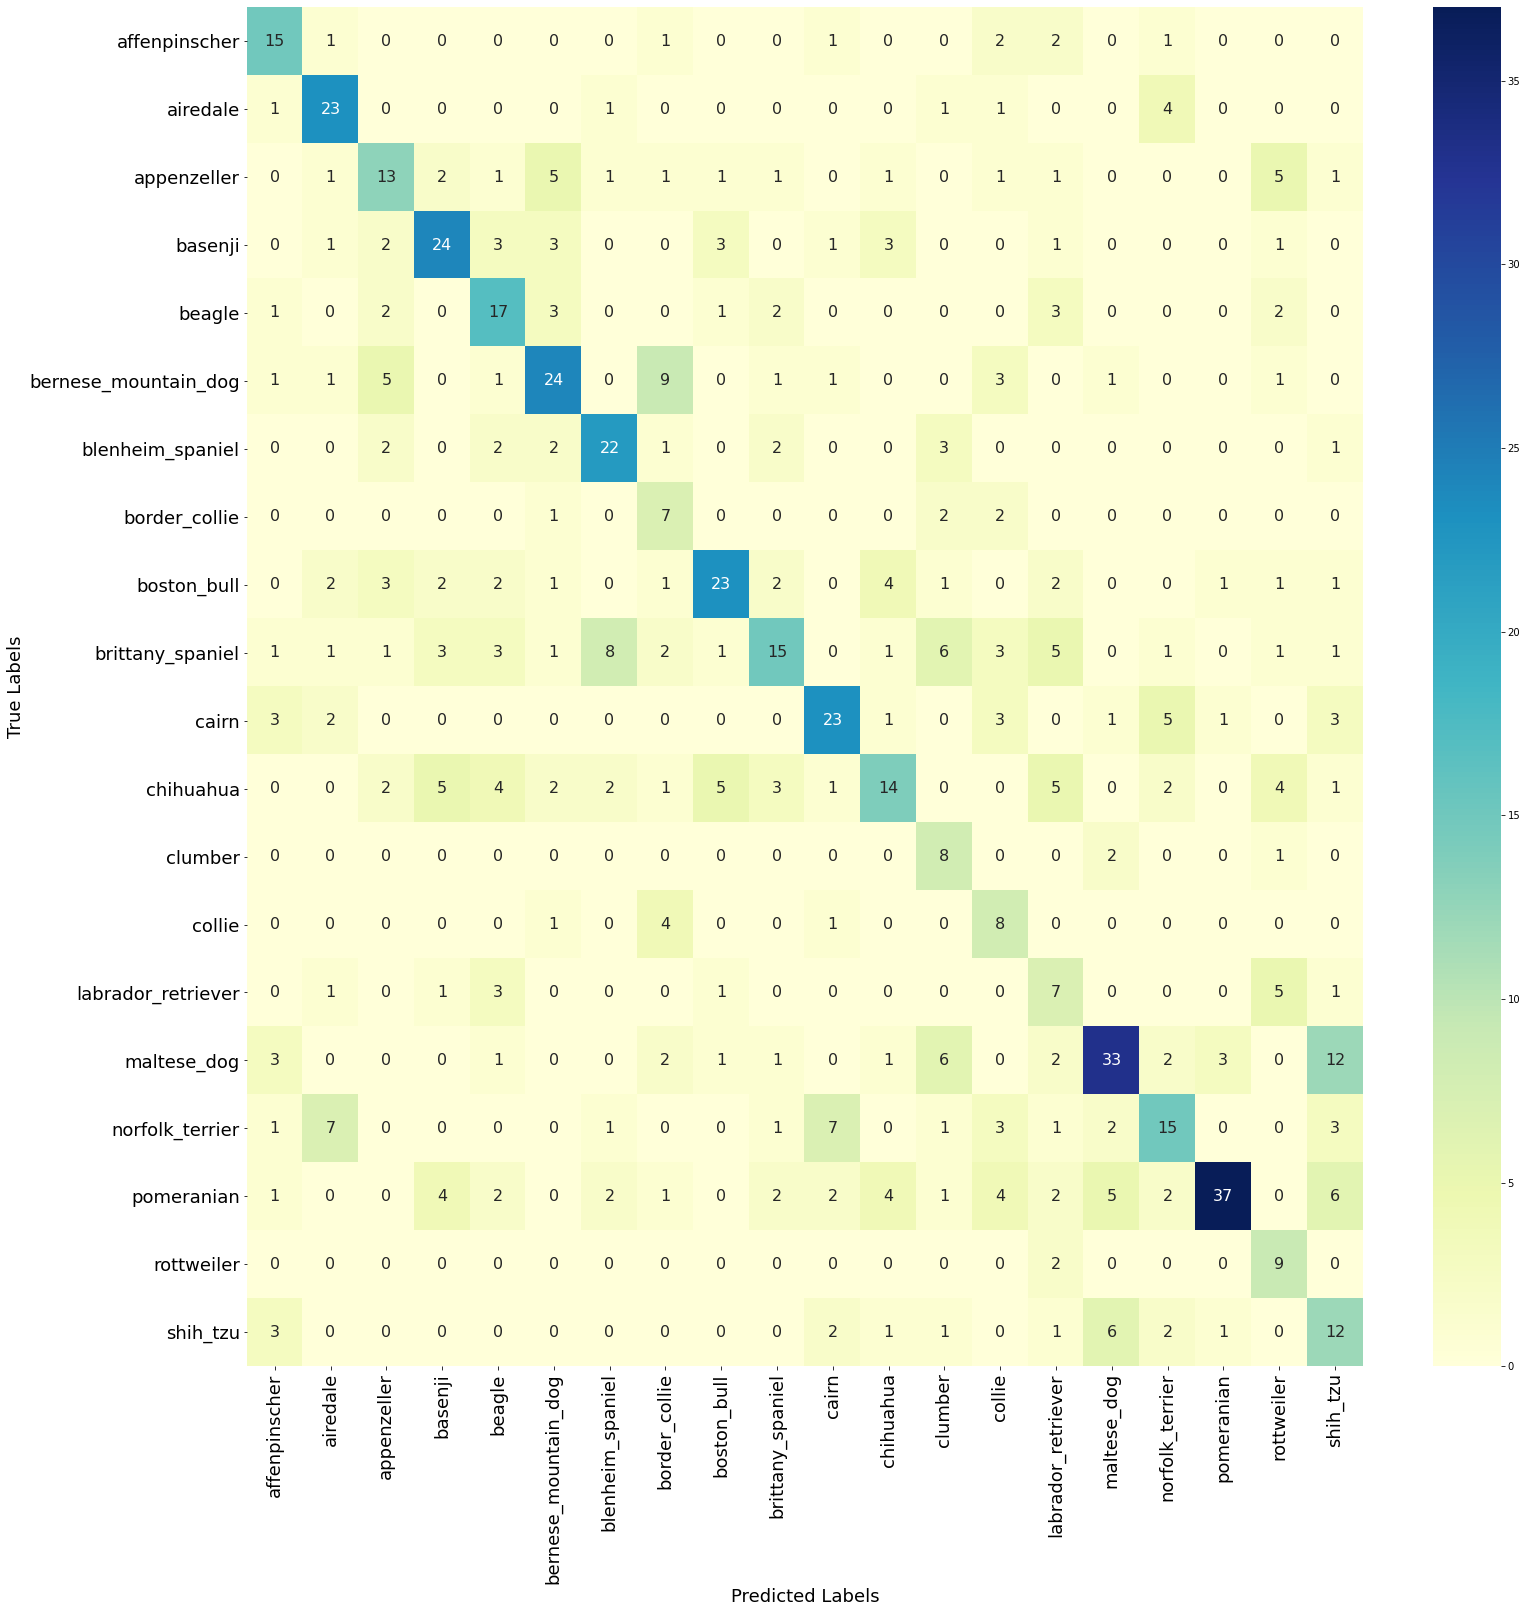

In [73]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confu
df_cm = pd.DataFrame(array, index = [i for i in label_list],
                  columns = [i for i in label_list])
plt.figure(figsize = (25,25))


sn.heatmap(df_cm, annot=True, cmap="YlGnBu",annot_kws={"size": 16})
plt.xlabel("Predicted Labels",fontsize=18)
plt.ylabel("True Labels",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.show()

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_classes, validation_set.classes))


              precision    recall  f1-score   support

           0       0.50      0.65      0.57        23
           1       0.57      0.74      0.65        31
           2       0.43      0.37      0.40        35
           3       0.59      0.57      0.58        42
           4       0.44      0.55      0.49        31
           5       0.56      0.50      0.53        48
           6       0.59      0.63      0.61        35
           7       0.23      0.58      0.33        12
           8       0.64      0.50      0.56        46
           9       0.50      0.28      0.36        54
          10       0.59      0.55      0.57        42
          11       0.47      0.27      0.35        51
          12       0.27      0.73      0.39        11
          13       0.27      0.57      0.36        14
          14       0.21      0.37      0.26        19
          15       0.66      0.49      0.56        67
          16       0.44      0.36      0.39        42
          17       0.86    